# Data Collection

### collect dataset from : https://www.kaggle.com/code/swish9/email-spam-detection/input

In [33]:
# importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [34]:
df=pd.read_csv("spam_ham.csv",encoding="ISO-8859-1")

In [35]:
df.head()  # here label 1 means spam and 0 means ham

,Unnamed: 0,Body,Label
0,0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,3,##############################################...,1
4,4,I thought you might like these:\n1) Slim Down ...,1


In [36]:
df.shape

(6046, 3)

In [37]:
df.columns

Index(['Unnamed: 0', 'Body', 'Label'], dtype='object')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6046 entries, 0 to 6045
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6046 non-null   int64 
 1   Body        6045 non-null   object
 2   Label       6046 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 141.8+ KB


In [39]:
df.describe()

,Unnamed: 0,Label
count,6046.000000,6046.000000
mean,3022.500000,0.313596
std,1745.474195,0.463993
min,0.000000,0.000000
25%,1511.250000,0.000000
50%,3022.500000,0.000000
75%,4533.750000,1.000000
max,6045.000000,1.000000


# data preprocessing

In [40]:
# check for null values
df.isnull().sum()

Unnamed: 0    0
Body          1
Label         0
dtype: int64

In [41]:
# let's check for unique values there
for i in df.columns[1:]:
    print("Unique values in ",i,"= ",df[i].unique())

Unique values in  Body =  ["\nSave up to 70% on Life Insurance.\nWhy Spend More Than You Have To?Life Quote Savings\nEnsuring your \n      family's financial security is very important. Life Quote Savings makes \n      buying life insurance simple and affordable. We Provide FREE Access to The \n      Very Best Companies and The Lowest Rates.Life Quote Savings is FAST, EASY and \n            SAVES you money! Let us help you get started with the best values in \n            the country on new coverage. You can SAVE hundreds or even thousands \n            of dollars by requesting a FREE quote from Lifequote Savings. Our \n            service will take you less than 5 minutes to complete. Shop and \n            compare. SAVE up to 70% on all types of Life insurance! Click Here For Your \n            Free Quote!Protecting your family is the best investment you'll ever \n          make!\nIf you are in receipt of this email \n      in error and/or wish to be removed from our list, PLEASE CLI

In [42]:
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [43]:
df.head()

,Body,Label
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,##############################################...,1
4,I thought you might like these:\n1) Slim Down ...,1


In [44]:
df.isnull().sum()

Body     1
Label    0
dtype: int64

In [45]:
# let's remove the null valued entry 
df.dropna(inplace=True)

In [46]:
df.isnull().sum()

Body     0
Label    0
dtype: int64

In [47]:
df.head()

,Body,Label
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,##############################################...,1
4,I thought you might like these:\n1) Slim Down ...,1


In [48]:
# Let's check whether data is balancing or not

df["Label"].value_counts()

0    4150
1    1895
Name: Label, dtype: int64

In [49]:
# the data is some much balanced , we can proceed with the model building

<AxesSubplot:xlabel='Label', ylabel='count'>

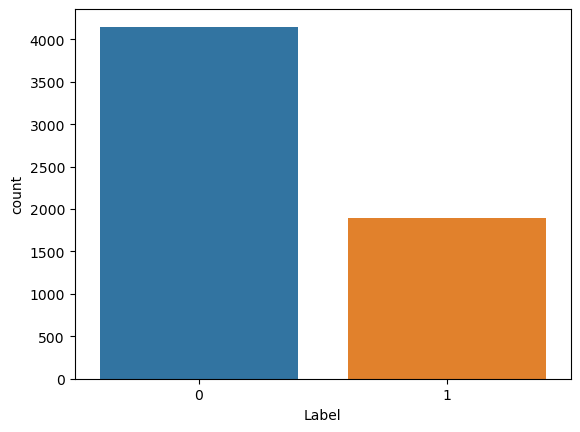

In [50]:
sns.countplot(df["Label"])

## Preprocess the data using NLP pipeline
- clean the data
- lower text
- remove stopwords
- Apply stemming or lemmatization

## first of all Let's solve independent feature

In [51]:
df["Body"][0]

"\nSave up to 70% on Life Insurance.\nWhy Spend More Than You Have To?Life Quote Savings\nEnsuring your \n      family's financial security is very important. Life Quote Savings makes \n      buying life insurance simple and affordable. We Provide FREE Access to The \n      Very Best Companies and The Lowest Rates.Life Quote Savings is FAST, EASY and \n            SAVES you money! Let us help you get started with the best values in \n            the country on new coverage. You can SAVE hundreds or even thousands \n            of dollars by requesting a FREE quote from Lifequote Savings. Our \n            service will take you less than 5 minutes to complete. Shop and \n            compare. SAVE up to 70% on all types of Life insurance! Click Here For Your \n            Free Quote!Protecting your family is the best investment you'll ever \n          make!\nIf you are in receipt of this email \n      in error and/or wish to be removed from our list, PLEASE CLICK HERE AND TYPE REMOVE. If

In [52]:
# import necessary libraries
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [53]:
# clean the data by removing any unnecessary information like punctuations
sol=re.sub('[^A-Za-z0-9]'," ",df["Body"][0])
sol

' Save up to 70  on Life Insurance  Why Spend More Than You Have To Life Quote Savings Ensuring your        family s financial security is very important  Life Quote Savings makes        buying life insurance simple and affordable  We Provide FREE Access to The        Very Best Companies and The Lowest Rates Life Quote Savings is FAST  EASY and              SAVES you money  Let us help you get started with the best values in              the country on new coverage  You can SAVE hundreds or even thousands              of dollars by requesting a FREE quote from Lifequote Savings  Our              service will take you less than 5 minutes to complete  Shop and              compare  SAVE up to 70  on all types of Life insurance  Click Here For Your              Free Quote Protecting your family is the best investment you ll ever            make  If you are in receipt of this email        in error and or wish to be removed from our list  PLEASE CLICK HERE AND TYPE REMOVE  If you        res

In [54]:
# Let's convert the text into lower
sol=sol.lower()
sol

' save up to 70  on life insurance  why spend more than you have to life quote savings ensuring your        family s financial security is very important  life quote savings makes        buying life insurance simple and affordable  we provide free access to the        very best companies and the lowest rates life quote savings is fast  easy and              saves you money  let us help you get started with the best values in              the country on new coverage  you can save hundreds or even thousands              of dollars by requesting a free quote from lifequote savings  our              service will take you less than 5 minutes to complete  shop and              compare  save up to 70  on all types of life insurance  click here for your              free quote protecting your family is the best investment you ll ever            make  if you are in receipt of this email        in error and or wish to be removed from our list  please click here and type remove  if you        res

In [55]:
sol=[i for i in sol.split() if i not in stopwords.words('english')]
sol

['save',
 '70',
 'life',
 'insurance',
 'spend',
 'life',
 'quote',
 'savings',
 'ensuring',
 'family',
 'financial',
 'security',
 'important',
 'life',
 'quote',
 'savings',
 'makes',
 'buying',
 'life',
 'insurance',
 'simple',
 'affordable',
 'provide',
 'free',
 'access',
 'best',
 'companies',
 'lowest',
 'rates',
 'life',
 'quote',
 'savings',
 'fast',
 'easy',
 'saves',
 'money',
 'let',
 'us',
 'help',
 'get',
 'started',
 'best',
 'values',
 'country',
 'new',
 'coverage',
 'save',
 'hundreds',
 'even',
 'thousands',
 'dollars',
 'requesting',
 'free',
 'quote',
 'lifequote',
 'savings',
 'service',
 'take',
 'less',
 '5',
 'minutes',
 'complete',
 'shop',
 'compare',
 'save',
 '70',
 'types',
 'life',
 'insurance',
 'click',
 'free',
 'quote',
 'protecting',
 'family',
 'best',
 'investment',
 'ever',
 'make',
 'receipt',
 'email',
 'error',
 'wish',
 'removed',
 'list',
 'please',
 'click',
 'type',
 'remove',
 'reside',
 'state',
 'prohibits',
 'e',
 'mail',
 'solicitation

In [56]:
#using stemming
s=PorterStemmer()

In [57]:
sol1=[s.stem(j) for j in sol]

sol1=" ".join(sol1)

In [58]:
sol1

'save 70 life insur spend life quot save ensur famili financi secur import life quot save make buy life insur simpl afford provid free access best compani lowest rate life quot save fast easi save money let us help get start best valu countri new coverag save hundr even thousand dollar request free quot lifequot save servic take less 5 minut complet shop compar save 70 type life insur click free quot protect famili best invest ever make receipt email error wish remov list pleas click type remov resid state prohibit e mail solicit insur pleas disregard email'

In [59]:
#using lemmatization
l=WordNetLemmatizer()

In [60]:
sol2=[l.lemmatize(j) for j in sol]
sol2=" ".join(sol)

In [61]:
sol2

'save 70 life insurance spend life quote savings ensuring family financial security important life quote savings makes buying life insurance simple affordable provide free access best companies lowest rates life quote savings fast easy saves money let us help get started best values country new coverage save hundreds even thousands dollars requesting free quote lifequote savings service take less 5 minutes complete shop compare save 70 types life insurance click free quote protecting family best investment ever make receipt email error wish removed list please click type remove reside state prohibits e mail solicitations insurance please disregard email'

#### we can use any one of the 2 from above

## Now let's solve it for total data

In [62]:
# preprocessing
clean_text=[]
for i in df.index:
    sol=re.sub('[^a-zA-Z0-9]'," ",df["Body"][i])
    sol=sol.lower()
    sol=[i for i in sol.split() if i not in stopwords.words("english")]
    sol=[s.stem(j) for j in sol]
    sol=" ".join(sol)
    clean_text.append(sol)
clean_text

['save 70 life insur spend life quot save ensur famili financi secur import life quot save make buy life insur simpl afford provid free access best compani lowest rate life quot save fast easi save money let us help get start best valu countri new coverag save hundr even thousand dollar request free quot lifequot save servic take less 5 minut complet shop compar save 70 type life insur click free quot protect famili best invest ever make receipt email error wish remov list pleas click type remov resid state prohibit e mail solicit insur pleas disregard email',
 '1 fight risk cancer http www adclick ws p cfm 315 pk0072 slim guarante lose 10 12 lb 30 day http www adclick ws p cfm 249 pk0073 get child support deserv free legal advic http www adclick ws p cfm 245 pk0024 join web fastest grow singl commun http www adclick ws p cfm 259 pk0075 start privat photo album onlin http www adclick ws p cfm 283 pk007have wonder day offer manag prizemamaif wish leav list pleas use link http www qve co

# Convert into numbers


In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [83]:
tfidf=TfidfVectorizer()

In [84]:
result=tfidf.fit_transform(clean_text)

In [85]:
result

<6045x54222 sparse matrix of type '<class 'numpy.float64'>'
	with 605068 stored elements in Compressed Sparse Row format>

In [86]:
result.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [87]:
result.shape

(6045, 54222)

In [88]:
df.shape

(6045, 2)

In [89]:
 independent=result.toarray()

In [90]:
independent

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [91]:
df["Label"]

0       1
1       1
2       1
3       1
4       1
       ..
6041    0
6042    0
6043    0
6044    0
6045    0
Name: Label, Length: 6045, dtype: int64

In [92]:
# here NLP Pipeline done, now we need to bulid ML model for NLP

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X_train,X_test,y_train,y_test=train_test_split(independent,df["Label"],test_size=0.33,random_state=42)

In [95]:
len(X_train)

4050

In [96]:
len(y_train)

4050

In [97]:
y_train

2358    0
1093    1
3572    0
4156    0
569     1
       ..
3773    0
5192    0
5227    0
5391    0
861     1
Name: Label, Length: 4050, dtype: int64

In [98]:
y_test

2506    0
4604    0
1993    0
1919    0
5467    0
       ..
49      1
4729    0
1057    1
2315    0
888     1
Name: Label, Length: 1995, dtype: int64

In [99]:
y_train.value_counts()

0    2826
1    1224
Name: Label, dtype: int64

In [100]:
y_test.value_counts()

0    1324
1     671
Name: Label, dtype: int64

## with respective to text Naive Bayes is the best model
- let's do with 
- Naive Bayes
- KNN
- Logistic Regression
- Decision Tree
- Random forest

In [101]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# KNN

In [102]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [103]:
def KNN(X_train,y_train,X_test,y_test):
    knn=KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train,y_train)
    y_train_pred=knn.predict(X_train)
    print("Training_accuracy = ",accuracy_score(y_train,y_train_pred))
    y_test_pred=knn.predict(X_test)
    print("Testing Accuracy = ",accuracy_score(y_test,y_test_pred))
    print("Classification Report : ")
    print(classification_report(y_test,y_test_pred))
    print("Confusion Matrix: ")
    print(confusion_matrix(y_test,y_test_pred))

In [104]:
# Logistics Regression

def LR(X_train,y_train,X_test,y_test):
    lr=LogisticRegression()
    lr.fit(X_train,y_train)
    y_train_pred=lr.predict(X_train)
    print("Training Accuracy = ",accuracy_score(y_train,y_train_pred))
    y_test_pred=lr.predict(X_test)
    print("Testing Accuracy = ",accuracy_score(y_test,y_test_pred))
    print("Classification Report : ")
    print(classification_report(y_test,y_test_pred))
    print("Confusion Matrix: ")
    print(confusion_matrix(y_test,y_test_pred))

In [105]:
# Naive Bayes
def NB(X_train,y_train,X_test,y_test):
    nb=MultinomialNB()
    nb.fit(X_train,y_train)
    y_train_pred=nb.predict(X_train)
    print("Training Accuracy = ",accuracy_score(y_train,y_train_pred))
    y_test_pred=nb.predict(X_test)
    print("Testing Accuracy = ",accuracy_score(y_test,y_test_pred))
    print("classification report :")
    print(classification_report(y_test,y_test_pred))
    print("confusion matrix :")
    print(confusion_matrix(y_test,y_test_pred))

In [106]:
# Decision Tree Classification
def DT(X_train,y_train,X_test,y_test):
    dt=DecisionTreeClassifier()
    dt.fit(X_train,y_train)
    y_train_pred=dt.predict(X_train)
    print("Training Accuracy = ",accuracy_score(y_train,y_train_pred))
    y_test_pred=dt.predict(X_test)
    print("Testing Accuracy = ",accuracy_score(y_test,y_test_pred))
    print("Claasification report :")
    print(classification_report(y_test,y_test_pred))
    print("Confusion matrix :")
    print(confusion_matrix(y_test,y_test_pred))

In [107]:
# Random tree classifier
def RF(X_train,y_train,X_test,y_test):
    rf=RandomForestClassifier(n_estimators=100)
    rf.fit(X_train,y_train)
    y_train_pred=rf.predict(X_train)
    print("Training Accuracy = ", accuracy_score(y_train,y_train_pred))
    y_test_pred=rf.predict(X_test)
    print("Testing Accuracy = ",accuracy_score(y_test,y_test_pred))
    print("Classification report :")
    print(classification_report(y_test,y_test_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test,y_test_pred))

In [108]:
# calling All model
def calling(X_train,y_train,X_test,y_test):
    print("---------------KNN-------------------")
    KNN(X_train,y_train,X_test,y_test)
    print("---------------Logistic Regression-------------------")
    LR(X_train,y_train,X_test,y_test)
    print("---------------Naive Bayes-------------------")
    NB(X_train,y_train,X_test,y_test)
    print("---------------Decision tree-------------------")
    DT(X_train,y_train,X_test,y_test)
    print("---------------Random forest-------------------")
    RF(X_train,y_train,X_test,y_test)

In [109]:
calling(X_train,y_train,X_test,y_test)

---------------KNN-------------------
Training_accuracy =  0.948395061728395
Testing Accuracy =  0.9348370927318296
Classification Report : 
              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1324
           1       0.86      0.97      0.91       671

    accuracy                           0.93      1995
   macro avg       0.92      0.94      0.93      1995
weighted avg       0.94      0.93      0.94      1995

Confusion Matrix: 
[[1215  109]
 [  21  650]]
---------------Logistic Regression-------------------
Training Accuracy =  0.9491358024691358
Testing Accuracy =  0.9283208020050125
Classification Report : 
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1324
           1       0.90      0.89      0.89       671

    accuracy                           0.93      1995
   macro avg       0.92      0.92      0.92      1995
weighted avg       0.93      0.93      0.93      1995

C

In [112]:
# Here Random forest and KNN has highest test accuracies, here i will use KNN
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [114]:
# Checking our own data
testing= 'Today i went to a movie and the movie is so good'
c=[]
sol=re.sub('[^a-zA-Z0-9]'," ",testing)
sol=sol.lower()
sol=[i for i in sol.split() if i not in stopwords.words('english')]
sol=[s.stem(j) for j in sol]
sol=" ".join(sol)
print(sol)
c.append(sol)
sol=tfidf.transform(c)
sol=sol.toarray()
print("Final vector ")
print(sol)
if knn.predict(sol)==0:
    print("Ham Mail")
else:
    print("Spam Mail")

today went movi movi good
Final vector 
[[0. 0. 0. ... 0. 0. 0.]]
Spam Mail


In [115]:
def prediction(text):
    c=[]
    text=re.sub('[^a-zA-Z0-9]'," ",text)
    text=text.lower()
    text=[i for i in text.split() if i not in stopwords.words("english")]
    text=[s.stem(j) for j in text]
    text = " ".join(text)
    c.append(text)
    text=tfidf.transform(c)
    text=text.toarray()
    if knn.predict(text)==0:
        print("The Mail is Ham")
    else:
        print("The Mail is Spam")

In [116]:
import pickle
with open("spam_Ml.pkl","wb") as f:
    pickle.dump(knn,f)

In [117]:
model=pickle.load(open("spam_Ml.pkl","rb"))

In [123]:
def pred(text):
    c=[]
    text=re.sub('[^a-zA-Z0-9]'," ",text)
    text=text.lower()
    text=[i for i in text.split() if i not in stopwords.words("english")]
    text=[s.stem(j) for j in text]
    text = " ".join(text)
    c.append(text)
    text=tfidf.transform(c)
    text=text.toarray()
    if model.predict(text)==0:
        print("The Mail is Ham")
    else:
        print("The Mail is Spam")

In [124]:
pred("\nSave up to 70% on Life Insurance.\nWhy Spend More Than You Have To?Life Quote Savings\nEnsuring your \n      family's financial security is very important. Life Quote Savings makes \n      buying life insurance simple and affordable. We Provide FREE Access to The \n      Very Best Companies and The Lowest Rates.Life Quote Savings is FAST, EASY and \n            SAVES you money! Let us help you get started with the best values in \n            the country on new coverage. You can SAVE hundreds or even thousands \n            of dollars by requesting a FREE quote from Lifequote Savings. Our \n            service will take you less than 5 minutes to complete. Shop and \n            compare. SAVE up to 70% on all types of Life insurance! Click Here For Your \n            Free Quote!Protecting your family is the best investment you'll ever \n          make!\nIf you are in receipt of this email \n      in error and/or wish to be removed from our list, PLEASE CLICK HERE AND TYPE REMOVE. If you \n      reside in any state which prohibits e-mail solicitations for insurance, \n      please disregard this \n      email.\n")

The Mail is Spam
